<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/TIC/Aula_09_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


# Estudo de caso: Políticas e Campanhas de não Violência

É comum em políticas públicas agrupar regiões (estados, cidades ou bairros) para estabelecer diretrizes a fim de atuar em um determinado problema da sociedade. Nesta aula, vamos lidar com um caso real acerca da adoção de políticas e campanhas de não violância dos Estados Unidos.

O conjunto de dados [US Arrests](https://www.kaggle.com/code/aishu2218/us-arrests-using-hierarchical-clustering-analysis) contém estatísticas de prisões por 100.000 residentes, sendo assassinato, assalto e estupro. Essas estatísticas foram extraídas dos 50 estados dos EUA. Além dessas estatísticas, também é fornecida a porcentagem da população que vive em áreas urbanas.

O intuito ao usar esse conjunto de dados é de agrupar estados que possuem uma certa similaridade para, então, estabelecer políticas específicas para cada grupo obtido. Notem que, aqui, não há um valor ou uma classe a ser prevista. Ou seja, estamos em um contexto de **aprendizado não-supervisionado**.

Para ler o conjunto de dados, use o link abaixo:

https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_usarrests.csv

Nesta aula, vamos abordar esse problemas a partir do método chamado *k-means*.


In [ ]:
# Lendo os dados - Note que definimos a coluna 0 como índice das linhas

import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_usarrests.csv",index_col=0)
dados.head()


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# **K-means (ou K-médias)**

O método k-means é um algoritmo de aprendizado não supervisionado de agrupamento (clustering) de dados. O objetivo do algoritmo é dividir um conjunto de dados em k grupos, em que cada grupo (ou cluster) é representativo de um conjunto de dados que compartilham características similares.

No **Aprendizado Não Supervisionado** o algoritmo é treinado para encontrar padrões em um conjunto de dados **sem a necessidade de uma categoria (ou variável resposta)**

Diferentemente do Aprendizado Supervisionado, no Aprendizado não Supervisionado **não há um Conjunto de Treinamento**, e portanto não haverá também um Conjunto de Testes. O aprendizado é feito sobre os dados, capturando algum padrão dos dados, mas sem uma `resposta`, como um valor ou classe, como você encontrou no Aprendizado Supervisionado. Neste sentido dizemos que o **Aprendizado não Supervisionado é mais Analítico que Preditivo**.

### Exemplos de uso de k-means:

- **Grupo de clientes**: uma loja de *e-commerce* pode usar o método K-means para agrupar seus clientes em diferentes com base em seus históricos de compras e comportamentos de navegação no site. Isso pode ajudar o e-commerce a personalizar suas campanhas de *marketing* para cada grupo.

- **Análise de imagens:** Uma imagem pode ser segmentada em diferentes grupos usando o método k-means com base em suas características, como cor e textura. Isso pode ser útil em aplicações de reconhecimento de imagem.

- **Detecção de padrões de consumo em diferentes bairros:** Uma rede de supermercado pode, por exemplo, agrupar suas lojas localizadas em diferentes bairros para entender o padrão de consumo de cada população de tais bairros. E, assim, estabelecer estratégias de estoque e vendas mais apropriadas para cada loja.

## Como funciona o método de k-means?

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_kmeans_method.png'>

O método consite em construir k *clusters* a partir de um conjunto de dados, em que o número de *clusters* a serem formados é escolhido pelo usuário. A escolha do número de clusters no algoritmo K-means é um desafio importante na análise de dados.

*   Se o valor de **k for muito pequeno** (poucos grupos), cada cluster pode conter muitos pontos de dados, resultando em uma segmentação grosseira dos dados e perda de informações importantes.
*   Se o valor de **k for muito grande** em relação ao tamanho do conjunto de dados, cada cluster pode conter muito poucos pontos de dados, tornando a segmentação inadequada e difícil de interpretar.

### **Passos para usar o método k-means:**

1.   Definir um k (um número de clusters ou agrupamentos).
2.   Escolher, aleatoriamente, o centro para cada cluster (centroide).
3.   Calcular a distância de cada ponto (dado) aos centroides. Cada ponto pertencerá ao centroide mais próximo
4.   Reposicionar o centróide, a nova posição do centroide deve ser a média da posição de todos os pontos do cluster.

Os dois ultimos passos são repetidos, iterativamente, até obtermos os clusters finais. A ideia é minimizar as distâncias intragrupos e maximizar as distâncias entre grupos.

Minimizar as distâncias intragrupos:
$$ min_{c} J_{in} = \sum_{i,k} || x_i - c_k ||^2 $$

Maximizar as distâncias entre grupos.

$$ max_{c} J_{out} = \sum_{i,k} || c_i - c_k ||^2 $$

Aqui empregaremos unicamente a **distância Euclidiana** embora outras funções distância possam ser empregadas.

**Observação:** O método k-means é sensível às unidades e escalas dos dados. Isso significa que se os dados não estiverem normalizados ou padronizados, os resultados da clusterização podem ser distorcidos ou menos confiáveis.


### Exemplo unidimensional

Suponha que temos os seguintes valores:

$$[1; 1,5; 2; 4; 5; 6; 7; 8; 9; 10]$$


Digamos que desejamos dividir esses valores em **3 clusters**.

Vamos selecionar, aleatoriamente, os 3 centroides (centro para cada cluster)

*   **Centroide 1:** 3
*   **Centroide 2:** 5
*   **Centroide 3:** 9

Vamos calcular a **distância ecludiana** entre cada valor e cada centroide, e atribuímos o valor ao cluster cujo centroide é o mais próximo. (Verifiquem as contas)



*   **Centroide 1:** [1, 1.5, 2, 4] →  Cluster 1
*   **Centroide 2:** [5, 6, 7] →  Cluster 2
*   **Centroide 3:** [8, 9, 10] →  Cluster 3

Agora, recalculamos os centroides de cada cluster, que serão a média dos valores que estão em cada cluster.

*   **Centroide 1:** (1+1.5+2+4)/4 = 2.125
*   **Centroide 2:** (5+6+7)/3 = 6
*   **Centroide 3:** (8+9+10)/3 = 9

Esse procedimento deve-se repetir até que não não haja mais mudanças nas atribuições dos valores aos clusters. **Após algumas iterações**, podemos obter os seguintes clusters:

*   **Cluster 1:** [1, 1.5, 2, 4]
*   **Cluster 2:** [5, 6, 7]
*   **Cluster 3:** [8, 9, 10]

Observação: O resultado do k-means pode depender dos valores iniciais escolhidos para os centroides

### Exemplo bidimensional

In [ ]:
#@markdown Execute este código para realizar as análises que se seguem.

# set up environment T11
#

#
# import basics
#

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set()

# import plotly as py
# import plotly.graph_objs as go
from sklearn.cluster import KMeans

# Linear
#-------------------------------------------------------------------------------

# a little bit dirty here... just for this case...
from scipy.spatial import distance
def kmeansL(X,k=2,max_iterations=100,pos=[2,8]):
    f = plt.figure(figsize=(10, 3))
    # plt.axis('off')
    plt.yticks([])
    plt.ylim([-2.5,0.5])
    # plt.xlim([0,70])
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.array(pos) # np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    print(list(X.T))
    print(centroids)
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    print(P)
    zeros = np.full((len(X)), 0, dtype=int)
    sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
    sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=100)
    plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
    plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
    plt.text(15,zeros[0:1]+0.2,'i = ' + str(0))
    for j in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        print(centroids)
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
        print(X.T)
        print(P)
        zeros = np.full((len(X)), -(j+1) , dtype=int)
        sns.scatterplot(X[:,0],zeros, hue=P,legend=None,marker='o',s=50)
        sns.scatterplot(centroids[:,0],zeros[0:2], legend=None,color='black',s=100)
        plt.text(centroids[0,0],zeros[0:1]-0.2,'C1 =' + str(np.round(centroids[0,0],1)))
        plt.text(centroids[1,0],zeros[0:1]-0.2,'C2 =' + str(np.round(centroids[1,0],1)))
        plt.text(15,zeros[0:1]+0.2,'i = ' + str(j+1))

    return P # , X, centroids

'''
P, PP, centroids = kmeansL(X,k=2,pos=[2,8])
P, PP, centroids = kmeansL(X,k=2,pos=[2,18])
P, PP, centroids = kmeansL(X,k=2,pos=[5,18])
P, PP, centroids = kmeansL(X,k=2,pos=[12,15])
'''

# Spacial
#-------------------------------------------------------------------------------

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    j=0

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        f = plt.figure(figsize=(5, 5))
        plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.85);

        plt.text(centers[0, 0]-0.3, centers[0, 1]+0.3, 'C1', fontsize=16, fontweight='bold')
        plt.text(centers[1, 0]-0.3, centers[1, 1]+0.3, 'C2', fontsize=16, fontweight='bold')
        plt.text(centers[2, 0]-0.3, centers[2, 1]+0.3, 'C3', fontsize=16, fontweight='bold')
        plt.text(centers[3, 0]-0.3, centers[3, 1]+0.3, 'C4', fontsize=16, fontweight='bold')

        plt.title('Kmeans, Iteração i= ' + str(j))
        j=j + 1

        plt.show()
    return centers, labels

# centers, labels = find_clusters(X, 4)

print('Set Up completed!')


Set Up completed!


Vamos usar a função `make_blobs` do módulo para gerar um conjunto de dados sintético com blobs ("manchas") de pontos de dados para visualizar como funciona o algoritmo de *k-means*.

A função `make_blobs` retorna uma tupla contendo:

*   Uma **matriz X** com os pontos de dados gerados
*   Um **vetor y** com as etiquetas de classe correspondentes a cada ponto de dados gerado

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)

X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

A função `find_clusters` foi desenvolvida e está no final do notebook para visualizar o processo iterativo do método *k-means*. Não é necessário entender o código desta função apenas seu resultado.

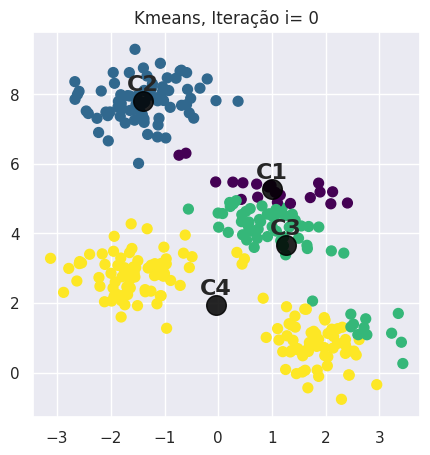

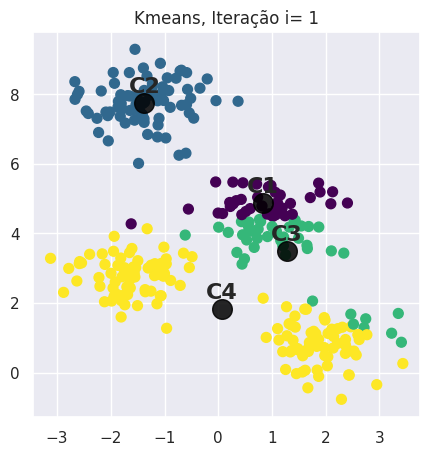

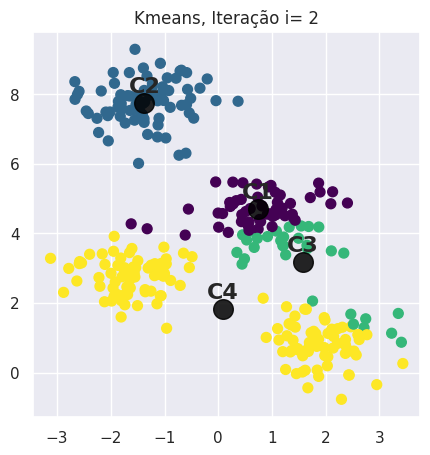

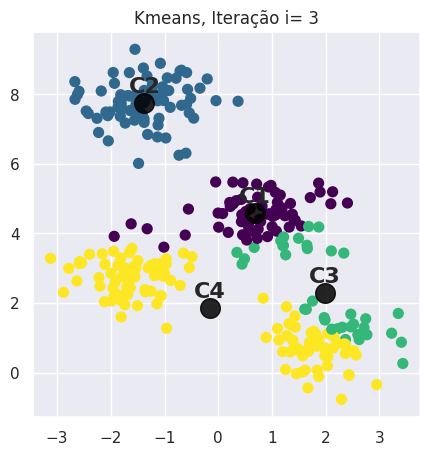

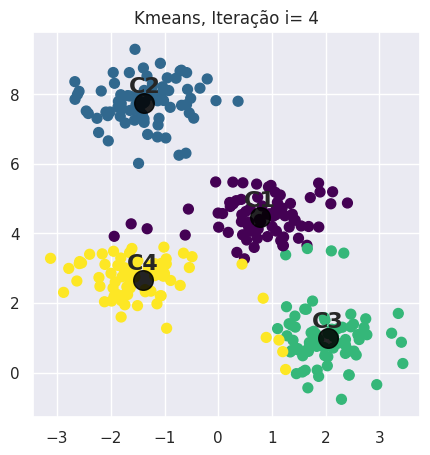

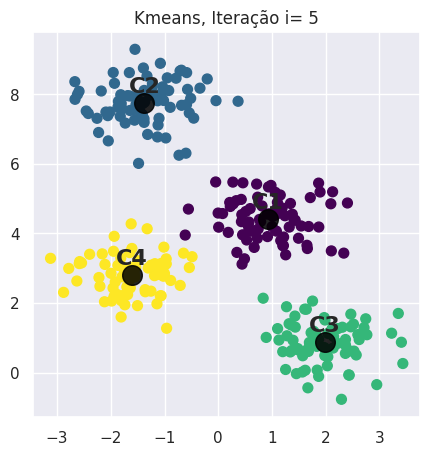

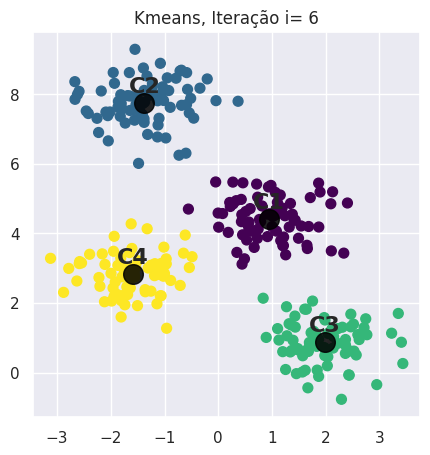

In [ ]:
centers, labels = find_clusters(X, 4)


## **Cuidado:**  **Clusterização** $\not=$ **Classificação**


*   A clusterização é um método não supervisionado, ou seja, não é
necessário ter categorias prévias para os dados. A ideia é agrupar os dados em clusters que sejam homogêneos internamente e heterogêneos entre si.
*   A classificação é um tipo de aprendizado supervisionado que tem como objetivo treinar um modelo para classificar novos dados em uma ou mais categorias pré-definidas (método supervisionado)

Suponha por exemplo um conjunto de dados de Empréstimos onde eles são classificados entre *Tx Padrão* e *Tx Especial* (juros mais baixos). Essa é a classificação dos dados. Mas, se você buscar com alguma técnica "grupos de Empréstimos" que guardem semelhanças entre si, talvez você encontre grupos  que exibem um outra relação dos dados completamente diferente de *Tx Padrão* e *Tx Especial*. Por exemplo, grupos de Empréstimos para Bens de Consumo para Jovens, Empréstimos para Capital de Giro e Outros, em todos eles havendo seus percentuais de *Tx Padrão* e *Tx Especial*.

Você ainda não vai empregar essa informação para *predizer* novos casos, mas talvez tomar decisões sobre esses grupos, como fazer uma campanha para educação de Jovens sobre o Empréstimo Consciente ou uma redução das Taxas para atrair mais Empréstimos de Capital de Giro.

# Retomando: Políticas e Campanhas de não Violência

Relembtando, no conjunto de dados [US Arrests](https://www.kaggle.com/code/aishu2218/us-arrests-using-hierarchical-clustering-analysis), há estatísticas de prisões por 100.000 residentes, sendo assassinato, assalto e estupro. Essas estatísticas foram extraídas dos 50 estados dos EUA. Além dessas estatísticas, também é fornecida a porcentagem da população que vive em áreas urbanas.


In [ ]:
# Leitura dos dados - Note que definimos a coluna 0 como índice das linhas

import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_usarrests.csv",index_col=0)
dados.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
# Verificando células vazias

dados.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Note que os dados encontram-se em **escalas diferentes e o método k- means é sensível a distância**, vamos reescalar os dados empregando a função `StandardScaler`.

**Cuidado!** Para usar k-means precisamos que os dados estejam em um *DataFrame*

In [ ]:
from sklearn.preprocessing import StandardScaler

X_matrix = StandardScaler().fit(dados).transform(dados)

dados = pd.DataFrame(X_matrix,columns=dados.columns, index=dados.index)
dados.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


### Definindo o número ideal de Clusters

Não há uma regra para escolher o número ideal de clusters, mas existem algumas técnicas que podem ajudar na escolha. Destacam-se os métodos: cotovelo, silhueta e da curvatura. Aqui vamos empregar apenas o método do cotovelo.

O **método do cotovelo** envolve plotar a **inércia** em relação ao número de clusters. O número ideal de clusters é encontrado no ponto em que a queda na inércia começa a se "nivelar", formando um "cotovelo" no gráfico.
* A inércia quantifica o quão dispersos estão os pontos dentro de cada cluster,  é calculada como a soma das distâncias ao quadrado entre cada ponto e o centróide do cluster mais próximo.



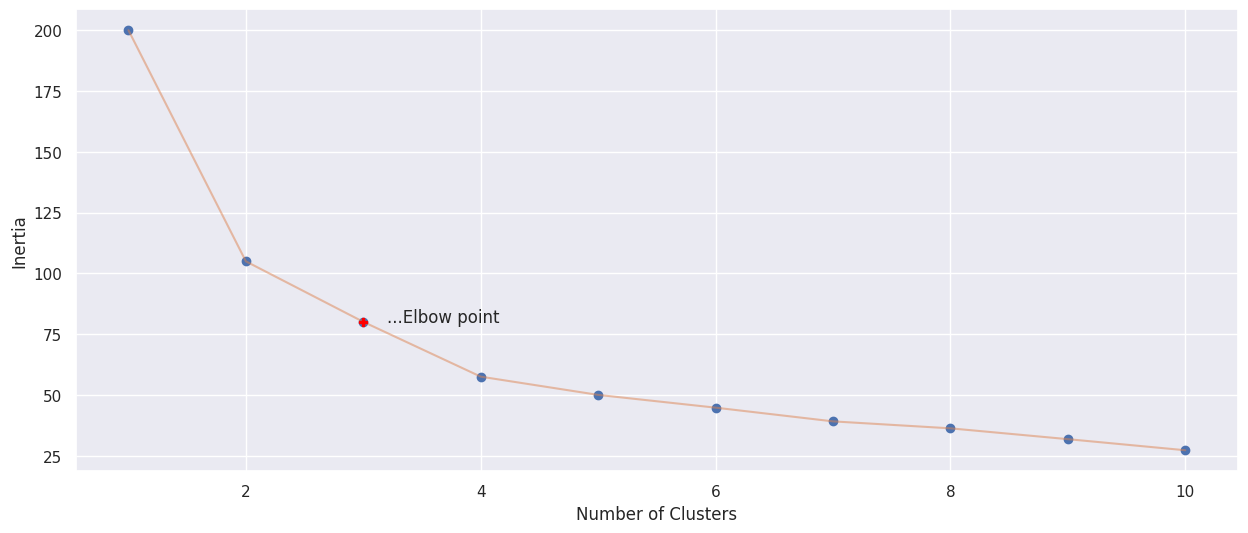

In [ ]:
# Dados
X = dados

inertia = []
for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()

Na dúvida, vamos usar 3 clusters!

In [ ]:
X = dados # Dados
seed = 1
clf = KMeans(n_clusters = 3 , random_state = seed) # Declara o modelo
clf.fit(X) # Calcula

# Resultados
labels = clf.labels_ # Indica os clusters para cada amostra (linha)
centroids = clf.cluster_centers_ # Indica as coordenadas dos centróides - centróides nas linhas e coordenadas nas colunas

print(labels)
print(centroids)

[1 1 1 2 1 1 0 0 1 1 0 2 1 0 2 0 2 1 2 1 0 1 2 1 1 2 2 1 2 0 1 1 1 2 0 0 0
 0 0 1 2 1 1 0 2 0 0 2 2 0]
[[-0.49440658 -0.3864845   0.58167593 -0.26431024]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]
 [-0.88515915 -1.0213324  -0.94990286 -0.92016524]]


In [ ]:
dados['cluster'] = labels
print(dados)

                  Murder   Assault  UrbanPop      Rape  cluster
rownames                                                       
Alabama         1.255179  0.790787 -0.526195 -0.003451        1
Alaska          0.513019  1.118060 -1.224067  2.509424        1
Arizona         0.072361  1.493817  1.009122  1.053466        1
Arkansas        0.234708  0.233212 -1.084492 -0.186794        2
California      0.281093  1.275635  1.776781  2.088814        1
Colorado        0.025976  0.402909  0.869548  1.883901        1
Connecticut    -1.040880 -0.736484  0.799761 -1.092723        0
Delaware       -0.437875  0.815030  0.450825 -0.585834        0
Florida         1.765415  1.990786  1.009122  1.150530        1
Georgia         2.229265  0.487757 -0.386621  0.492653        1
Hawaii         -0.577030 -1.512241  1.218484 -0.111300        0
Idaho          -1.203228 -0.615272 -0.805344 -0.758392        2
Illinois        0.605789  0.948363  1.218484  0.298525        1
Indiana        -0.136372 -0.700121 -0.03

### Exibindo os clusters
Usando só duas variáveis: muder e urbanpop. Por que não podemos usar todas as variáveis?

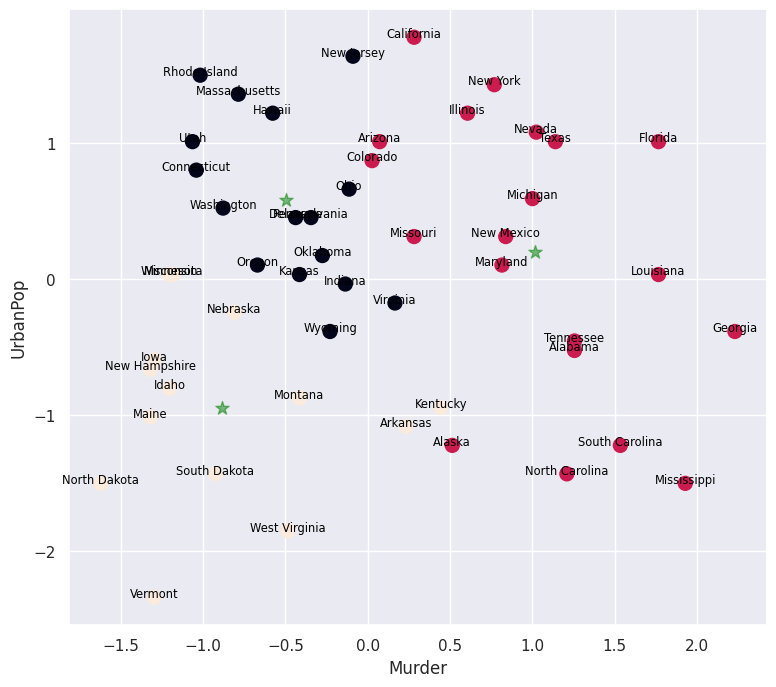

In [ ]:
f = plt.figure(figsize=(9,8))

plt.scatter( x = 'Murder' ,y = 'UrbanPop' , data = dados , c =labels , s = 100)
plt.scatter(x = centroids[ : ,0] , y =  centroids[ : ,2] , s = 100 , c = 'green' , alpha = 0.5, marker="*")

for line in range(0,dados.shape[0]):
     plt.text(dados.Murder[line], dados.UrbanPop[line], dados.index[line],
              horizontalalignment='center',
              size='x-small',
              color='black')

plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

## Explorando os resultados

### Tamanho dos Clusters

Verifique ainda se os grupos formados não levam a um grupo excessivamente grande (90% dos dados por exemplo) ou pequeno (1% dos dados por exemplos).

In [ ]:
dados.cluster.value_counts(normalize=True)

cluster
1    0.40
0    0.32
2    0.28
Name: proportion, dtype: float64

### Caracterizando os Grupos

Vamos explorar esses grupos procurando características comuns. Vamos usar a base de dados original (sem transformações). Vamos importar novamente a base de dados.

In [ ]:
df= pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv',index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Vamos adicionar a coluna "cluster" usando o modelo anterior

In [ ]:
df['cluster'] = labels
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
rownames,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [ ]:
df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


Analise os resultados!

## **Experimente você**

Empregue o seguinte dataset `iris`

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Carregar a base de dados Iris
iris_data = load_iris()
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris
